# Titanic Survival Prediction - Random Forest Model

使用随机森林模型预测泰坦尼克号乘客生存情况

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
np.random.seed(42)

In [2]:
# 加载数据
train_data = pd.read_csv('data/processed_train.csv')
test_data = pd.read_csv('data/processed_test.csv')

# 准备特征和目标变量
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("训练集形状:", X_train.shape)
print("验证集形状:", X_val.shape)

训练集形状: (712, 17)
验证集形状: (179, 17)


## 随机森林参数优化

In [3]:
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建随机森林模型
rf = RandomForestClassifier(random_state=42)

# 进行网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("最佳参数:", grid_search.best_params_)
print("最佳交叉验证得分:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳参数: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
最佳交叉验证得分: 0.8313995863291638


In [4]:
# 使用最佳参数创建模型
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# 在验证集上评估
y_pred = best_rf.predict(X_val)

# 打印分类报告
print("分类报告:")
print(classification_report(y_val, y_pred))

分类报告:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11

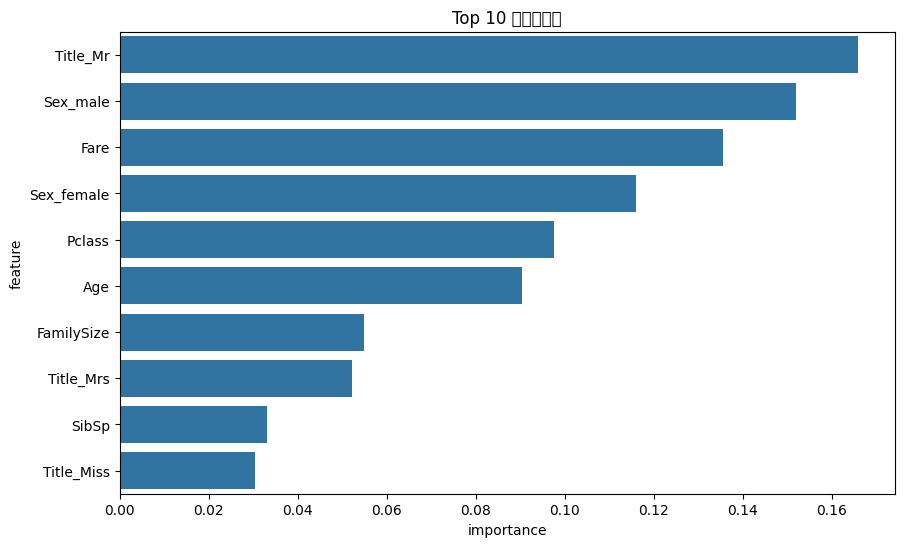

In [5]:
# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 最重要特征')
plt.show()

## 生成预测结果

In [6]:
# 使用最佳模型对测试集进行预测
test_predictions = best_rf.predict(test_data)

# 创建提交文件
submission = pd.DataFrame({
    'PassengerId': range(892, 892 + len(test_predictions)),
    'Survived': test_predictions
})

# 保存预测结果
submission.to_csv('data/rf_submission.csv', index=False)
print("预测结果已保存到 'rf_submission.csv'")

预测结果已保存到 'rf_submission.csv'
